In [43]:
# import the modules
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [44]:
# Code starts here
train = pd.read_csv("train.csv")

# replace the space with _
train.columns=train.columns.str.strip().str.lower().str.replace(' ', '_')

# Check the percentage of missing value
missing_data = pd.DataFrame({'total_missing': train.isnull().sum(), 'perc_missing': (train.isnull().sum()/82790)*100})
print(missing_data)


# drop the the irrelevant columns (or with high missing values)
train.drop(['id', 'waist', 'bust', 'user_name','review_text','review_summary','shoe_size','shoe_width'], axis=1, inplace=True)

print(train.fit.value_counts())
# Code ends here

                total_missing  perc_missing
id                          0      0.000000
item_id                     0      0.000000
waist                   63913     77.198937
size                        0      0.000000
quality                    54      0.065225
cup_size                 4952      5.981399
hips                    21332     25.766397
bra_size                 4752      5.739824
category                    0      0.000000
bust                    56774     68.575915
height                    886      1.070178
user_name                   0      0.000000
length                     29      0.035028
fit                         0      0.000000
user_id                     0      0.000000
shoe_size               43918     53.047470
shoe_width              51343     62.015944
review_summary           5373      6.489914
review_text              5373      6.489914
fit      45414
small    10416
large    10402
Name: fit, dtype: int64


### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data, apply some data preprocessing and engineering techniques.

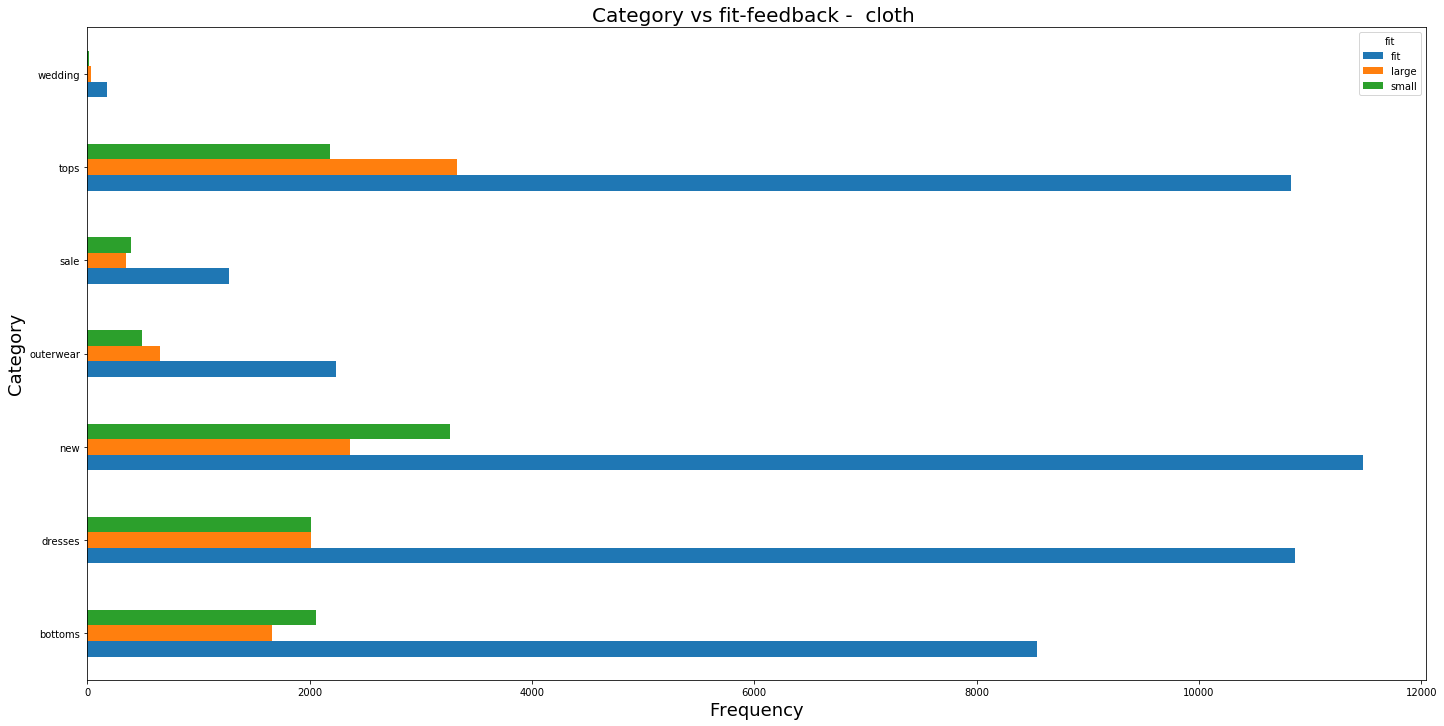

In [45]:
""" We will visualize how the items of different categories fared in terms of - fit. 
This will tell us which categories need more attention! 
Viewing the frequency counts directly- for comparison across categories.
"""

# Category vs fit feedback

def plot_barh(df,col, cmap = None, stacked=False, norm = None):
    df.plot(kind='barh', colormap=cmap, stacked=stacked)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    plt.title("Category vs {}-feedback -  cloth {}".format(col, '(Normalized)' if norm else ''), fontsize= 20)
    plt.ylabel('Category', fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)


# Code starts here
# plot the bar chart
g_by_category = train.groupby('category')
cat_fit = g_by_category['fit'].value_counts()
cat_fit = cat_fit.unstack()
plot_barh(cat_fit, 'fit')

# Code ends here

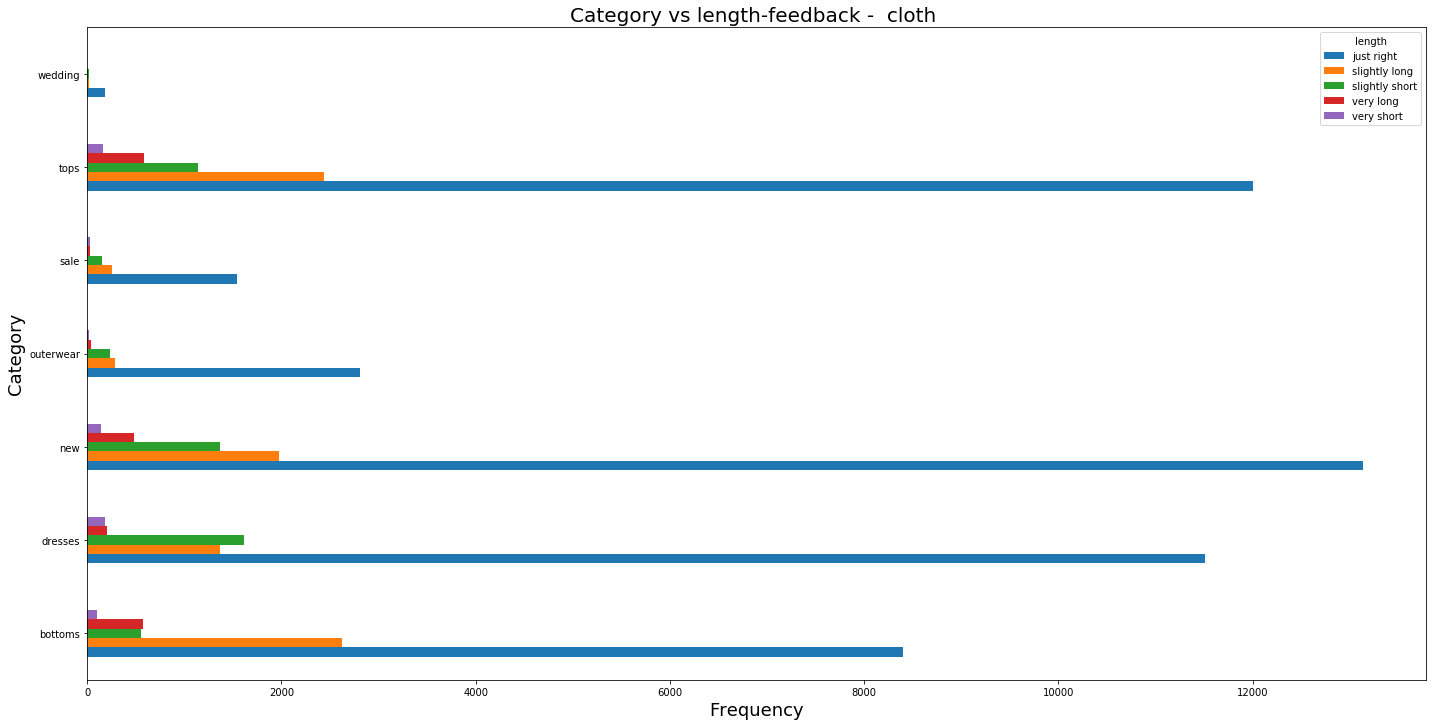

In [46]:
# Category vs Length

# plot the bar chart for category vs length
cat_len = g_by_category['length'].value_counts()
cat_len = cat_len.unstack()
plot_barh(cat_len, 'length')

In [47]:
""" In the height feature, we have the height in feet so we need to convert the feet to centimeters. 
By doing this we will get the better understanding of the height of the customer in centimeters.
"""

# function to to convert feet to inches

def get_cms(x):
    if type(x) == type(1.0):
        return
    #print(x)
    try: 
        return (int(x[0])*30.48) + (int(x[4:-2])*2.54)
    except:
        return (int(x[0])*30.48)

# apply on train data    
train.height = train.height.apply(get_cms)

In [48]:
train.head()

,item_id,size,quality,cup_size,hips,bra_size,category,height,length,fit,user_id
0,136482,15,3.0,dd/e,36.0,36.0,new,162.56,just right,fit,357490
1,723977,15,5.0,c,42.0,36.0,bottoms,172.72,just right,fit,897280
2,647551,8,4.0,b,36.0,34.0,tops,162.56,slightly short,large,279853
3,404557,12,3.0,dd/e,44.0,32.0,new,165.10,slightly short,small,912482
4,414857,15,3.0,d,38.0,38.0,new,175.26,just right,fit,978354


In [49]:
missing_data = pd.DataFrame({'total_missing': train.isnull().sum(), 'perc_missing': (train.isnull().sum()/82790)*100})
print(missing_data)

          total_missing  perc_missing
item_id               0      0.000000
size                  0      0.000000
quality              54      0.065225
cup_size           4952      5.981399
hips              21332     25.766397
bra_size           4752      5.739824
category              0      0.000000
height              886      1.070178
length               29      0.035028
fit                   0      0.000000
user_id               0      0.000000


Dealing with the missing value is very important. If the feature is having less number of missing value we will remove the row which contain missing value. Also we are going to fill null value of the numerical variable with `mean` and replace the categorical missing values with mode. 

## Observation:

* `bra_size`, `height`, `quality` and `hips` contains the numerical values so fill the missing value with mean
* `cup_size` and `length` contains the categorical values so replace the missing values with mode


In [50]:
print(train.isnull().sum())

# drop missing values
train.dropna(subset=['height','length','quality'],inplace=True)

# fill missing values with mean
train['bra_size'].fillna((train['bra_size'].mean()), inplace=True)
train['hips'].fillna((train['hips'].mean()), inplace=True)
train['height'].fillna((train['height'].mean()), inplace=True)
train['quality'].fillna((train['quality'].mean()), inplace=True)

# fill missing value with mode
mode_ = train['cup_size'].mode()[0]
train['cup_size']=train['cup_size'].replace(np.nan,mode_)
mode_len = train['length'].mode()[0]
train['length']=train['length'].replace(np.nan,mode_len)


print(train.isnull().sum())



item_id         0
size            0
quality        54
cup_size     4952
hips        21332
bra_size     4752
category        0
height        886
length         29
fit             0
user_id         0
dtype: int64
item_id     0
size        0
quality     0
cup_size    0
hips        0
bra_size    0
category    0
height      0
length      0
fit         0
user_id     0
dtype: int64


In [51]:
train.head()

,item_id,size,quality,cup_size,hips,bra_size,category,height,length,fit,user_id
0,136482,15,3.0,dd/e,36.0,36.0,new,162.56,just right,fit,357490
1,723977,15,5.0,c,42.0,36.0,bottoms,172.72,just right,fit,897280
2,647551,8,4.0,b,36.0,34.0,tops,162.56,slightly short,large,279853
3,404557,12,3.0,dd/e,44.0,32.0,new,165.10,slightly short,small,912482
4,414857,15,3.0,d,38.0,38.0,new,175.26,just right,fit,978354


In [52]:
"""You can see that some of the features of category, cup_size and length in the data are textual in nature.
But any prediction model only work well in the numerical data so we need to convert that features into the numerical format. 
Let's convert them into one hot encoding.
"""

# one hot encoding
train=pd.get_dummies(data=train,columns=["category", "cup_size","length"],prefix=["category", "cup_size","length"])


### Model building

- Split the data into train and test.
- Now let's come to the actual task, predict the values of `fit` after building a Machine learning model.
- Try improving upon the `accuracy_score` ([Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html))

In [53]:
# Code starts here

# store independent variable
X = train.drop(['fit'],axis=1)

# store dependent variable
y = train['fit']

# Split the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=6)

# Instantiate logistic regression
model = DecisionTreeClassifier(random_state = 6)

# fit the model
model.fit(X_train,y_train)

# predict the result
y_pred =model.predict(X_test)

# calculate the f1 score
score = accuracy_score(y_test, y_pred)
print(score)

# calculate the precision score
precision = precision_score(y_test, y_pred, average=None)
print(precision)


0.5753214799684323
[0.7299454  0.28092643 0.26052999]


In [54]:
# Now let's use the decision tree model once agian. We will select best model by cross-validation using Grid Search.

# parameters for grid search
parameters = {'max_depth':[5,10],'criterion':['gini','entropy'],'min_samples_leaf':[0.5,1]}

# Code starts here

# instantiate Decision tree classifier model
model=DecisionTreeClassifier(random_state=6)

# grid search on logistic regression
grid = GridSearchCV(estimator=model, param_grid=parameters)
grid.fit(X_train, y_train)
# make predictions 
y_pred = grid.predict(X_test)

# accuracy check
accuracy= grid.score(X_test,y_test)
print(accuracy)

# calculate the precision score
precision = precision_score(y_test, y_pred, average=None)
print(precision)


0.6986212339260016
[0.70750677 0.61124122 0.51939925]


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [55]:
# Code Starts here
# Prediction on test data

# Read the test data
test = pd.read_csv('test.csv')


# Apply the transformations on test
test.columns=test.columns.str.strip().str.lower().str.replace(' ', '_')
test.drop(['waist', 'bust', 'user_name','review_text','review_summary','shoe_size','shoe_width'], axis=1, inplace=True)
test.height = test.height.apply(get_cms)

# drop missing values
test.dropna(subset=['height','length','quality'],inplace=True)

# fill missing values with mean
test['bra_size'].fillna((train['bra_size'].mean()), inplace=True)
test['hips'].fillna((train['hips'].mean()), inplace=True)
test['height'].fillna((train['height'].mean()), inplace=True)
test['quality'].fillna((train['quality'].mean()), inplace=True)

# fill missing value with mode
test['cup_size']=test['cup_size'].replace(np.nan,mode_)
test['length']=test['length'].replace(np.nan,mode_len)

# one hot encoding
test=pd.get_dummies(data=test,columns=["category", "cup_size","length"],prefix=["category", "cup_size","length"])

# Storing the id from the test file
id_ = test['id']
test.drop(['id'], axis=1, inplace=True)

# Predict on the test data
y_pred_test = grid.predict(test)
y_pred_test = y_pred_test.flatten()

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'fit':y_pred_test})

# Convert the sample submission file into a csv file
# sample_submission.to_csv('sample_submission.csv',index=False)

# Code ends here